## Load Data

In [4]:
import tensorflow as tf
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


## Ckeck Data

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


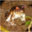

In [6]:
from PIL import Image as im

image_list = []

for i in range(20):
  image_array = x_train[i]
  image_array = image_array.reshape(32,32,3)
  image_list.append(im.fromarray(image_array, mode='RGB'))

image_list[0]

In [7]:
item_map = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
item_map[y_train[0][0]]

'frog'

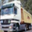

In [8]:
image_list[1]

In [9]:
item_map[y_train[1][0]]

'truck'

## Setup Model

In [10]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, 5, activation='relu', padding='same', input_shape=(32,32,3)),
  tf.keras.layers.MaxPooling2D(pool_size=(3, 3),strides=(2, 2), padding='same'),
  tf.keras.layers.Conv2D(64, 5, activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D(pool_size=(3, 3),strides=(2, 2), padding='same'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(384, activation='relu'),
  tf.keras.layers.Dense(192, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10)
])
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

## Train

In [11]:
model.compile(optimizer='adam',
        loss=loss_fn,
        metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=30)

Epoch 1/30
1563/1563 [==============================] - 187s 119ms/step - loss: 2.2554 - accuracy: 0.2111
Epoch 2/30
1563/1563 [==============================] - 184s 117ms/step - loss: 1.8409 - accuracy: 0.3201
Epoch 3/30
1563/1563 [==============================] - 183s 117ms/step - loss: 1.6991 - accuracy: 0.3777
Epoch 4/30
1563/1563 [==============================] - 183s 117ms/step - loss: 1.5937 - accuracy: 0.4250
Epoch 5/30
1563/1563 [==============================] - 183s 117ms/step - loss: 1.5018 - accuracy: 0.4649
Epoch 6/30
1563/1563 [==============================] - 183s 117ms/step - loss: 1.4297 - accuracy: 0.4911
Epoch 7/30
1563/1563 [==============================] - 183s 117ms/step - loss: 1.3755 - accuracy: 0.5172
Epoch 8/30
1563/1563 [==============================] - 182s 117ms/step - loss: 1.3201 - accuracy: 0.5348
Epoch 9/30
1563/1563 [==============================] - 182s 117ms/step - loss: 1.2691 - accuracy: 0.5580
Epoch 10/30
1563/1563 [=======================

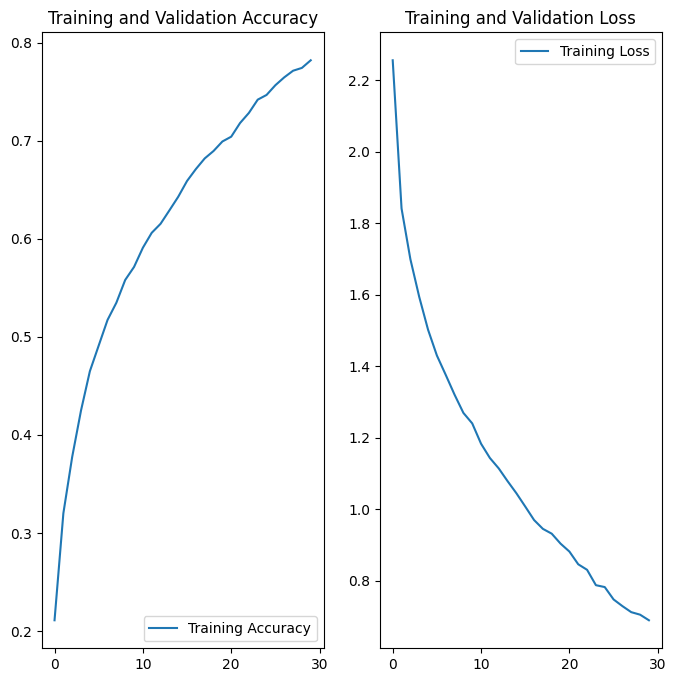

In [13]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']


loss = history.history['loss']


epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')

plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')

plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Evalute

In [14]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 10s - loss: 2.0188 - accuracy: 0.5823 - 10s/epoch - 32ms/step


[2.018784284591675, 0.5823000073432922]

Although training performance is good, test performance does not match

## Try to improve Performance by Data Augmentation

In [ ]:
import numpy as np

def data_augmentation(image):
  # image = tf.image.random_crop(image, [28, 28, 3])
  image = tf.image.random_flip_left_right(image)
  image = tf.image.random_flip_up_down(image)
  # image = tf.image.random_brightness(image, 63)
  # image = tf.image.random_contrast(image, 0.2, 1.8)
  return image.numpy()


def get_batch(x_train, y_train, batch_size):
  t = int(x_train.shape[0]/batch_size)+1
  for i in range(t):
    x_train_aug = data_augmentation(x_train[i*batch_size]).reshape((1, 32, 32, 3))
    for image in x_train[i*batch_size+1:(i+1)*batch_size,:]:
      x_train_aug = np.append(x_train_aug,data_augmentation(image).reshape((1, 32, 32, 3)), axis=0)
    yield x_train_aug, y_train[i*batch_size:(i+1)*batch_size]

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, 5, activation='relu', padding='valid', input_shape=(32,32,3)),
  tf.keras.layers.MaxPooling2D(pool_size=(3, 3),strides=(2, 2), padding='valid'),
  tf.keras.layers.Conv2D(64, 5, activation='relu', padding='valid'),
  tf.keras.layers.MaxPooling2D(pool_size=(3, 3),strides=(2, 2), padding='valid'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(384, activation='relu'),
  tf.keras.layers.Dense(192, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(10)
])
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

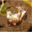

In [ ]:
from PIL import Image as im

image_list = []

a = get_batch(x_train, y_train, 32)
x_train_i, y_train_i = a.send(None)

for image_array in x_train_i:
  image_array = image_array.reshape(32,32,3)
  image_list.append(im.fromarray(image_array, mode='RGB'))

image_list[0]

In [ ]:
item_map = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
item_map[y_train_i[0][0]]

'frog'

In [ ]:
model.compile(optimizer='adam',
        loss=loss_fn,
        metrics=['accuracy'])

ds_generator = tf.data.Dataset.from_generator(get_batch, args=[x_train, y_train, 32], output_types=(tf.float32, tf.uint8), output_shapes = ([None, 32, 32, 3],[None, 1]) )

history = model.fit(ds_generator, epochs=30)

Epoch 1/20
1563/1563 [==============================] - 190s 121ms/step - loss: 2.3461 - accuracy: 0.1922
Epoch 2/20
1563/1563 [==============================] - 186s 119ms/step - loss: 1.7795 - accuracy: 0.3464
Epoch 3/20
1563/1563 [==============================] - 186s 119ms/step - loss: 1.6792 - accuracy: 0.3855
Epoch 4/20
1563/1563 [==============================] - 187s 120ms/step - loss: 1.6122 - accuracy: 0.4151
Epoch 5/20
1563/1563 [==============================] - 188s 120ms/step - loss: 1.5483 - accuracy: 0.4459
Epoch 6/20
1563/1563 [==============================] - 186s 119ms/step - loss: 1.4947 - accuracy: 0.4661
Epoch 7/20
1563/1563 [==============================] - 186s 119ms/step - loss: 1.4572 - accuracy: 0.4809
Epoch 8/20
1563/1563 [==============================] - 186s 119ms/step - loss: 1.4229 - accuracy: 0.4947
Epoch 9/20
1563/1563 [==============================] - 187s 119ms/step - loss: 1.3870 - accuracy: 0.5115
Epoch 10/20
1563/1563 [=======================

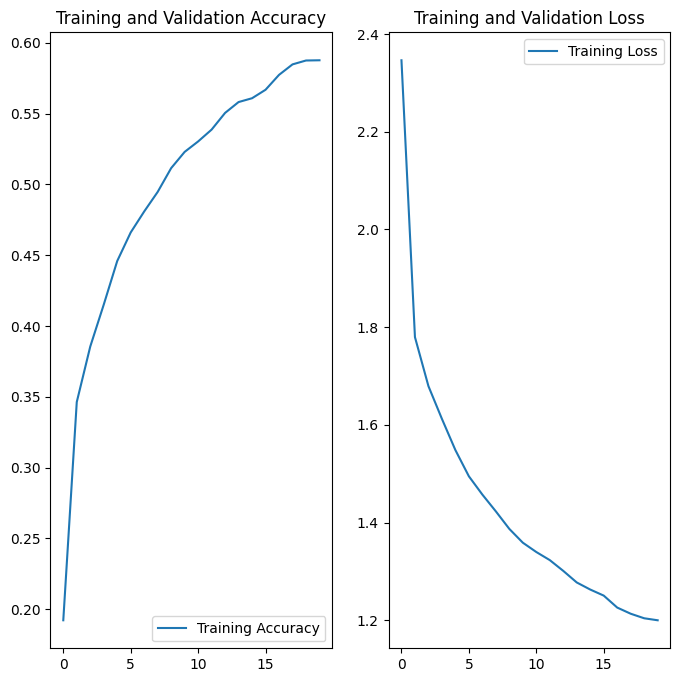

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']


loss = history.history['loss']


epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')

plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')

plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

It can be seen that the trend gradually flattens out, and this model may have reached an extreme point.

In [ ]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 7s - loss: 1.2043 - accuracy: 0.5842 - 7s/epoch - 21ms/step


[1.2042936086654663, 0.5842000246047974]

Data augmentation may not be as successful as expected